<a href="https://colab.research.google.com/github/ericvillaceconomist/API-U.S.-Securities-and-Exchange-Commission-SEC-/blob/main/Projeto_API_SEC_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O objetivo deste projeto é coletar dados de empresas listadas nas bolsas de valores norte-americanas que siga o US-GAAP.

# Será gerado um método para automatizar e escalar a consulta 



Autor: Eric Villac, FMVA

In [ ]:
!pip install bs4

In [ ]:
!pip install fsspec
import pandas as pd
import requests
from urllib.request import urlopen, urlretrieve
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import Request
from urllib.error import URLError, HTTPError

     |████████████████████████████████| 118 kB 10.1 MB/s 


Site para consulta dos CIKs (site for query CIKs):

https://www.sec.gov/edgar/searchedgar/companysearch.html

https://www.sec.gov/Archives/edgar/cik-lookup-data.txt

# **MUITA ATENÇÃO!**

Caso as células não rodem:

1. Abrir o link url (logo abaixo);
2. rodar novamente o códgio.


Caso os métodos não rodem:

1. Abrir o link url (logo abaixo);
2. rodar novamente o código.

Nesse caso, se constar que a conta não existe, optar pela consulta da empresa com uma conta determinada.



# **PAY ATTENTION!**

If the cells do not rotate:

1. Open the url link (just below);
2. run the code again.


If the methods don't run:

1. Open the url link (just below);
2. run the code again.

In this case, if it appears that the account does not exist, choose to consult the company with a specific account.

# Testando o funcionamento do link. Nesse caso é bom abrir o link no navegador primeiro para testar e visualizar a abertura da API.

# Testing the link. In that case it's good to open the link in the browser first to test and preview the API opening.

Exemplo abaixo Exxon Mobil

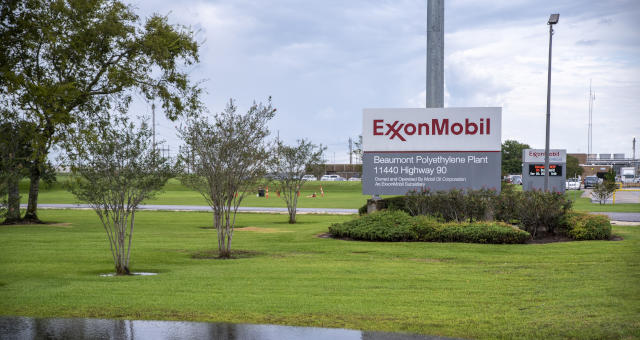

In [ ]:
url = 'https://data.sec.gov/api/xbrl/companyfacts/CIK0000034088.json'

In [ ]:
response = requests.get(url)
df = pd.read_json(response.text)

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df1 = pd.DataFrame(df)
df1.head()

,cik,entityName,facts
dei,34088,Exxon Mobil Corporation,{'EntityCommonStockSharesOutstanding': {'label...
us-gaap,34088,Exxon Mobil Corporation,{'AccountsAndFinancingReceivableAllowanceForCr...


# **Cash flow Example**

In [ ]:
def Consult3Accounts(cik,s1,s2,s3):
  url = f'https://data.sec.gov/api/xbrl/companyfacts/CIK{cik}.json'
  response = requests.get(url)
  df = pd.read_json(response.text)
  empresa = df['entityName']['us-gaap']
  print(empresa)

  #Here, after naming accounts, they are put in a list, in order to iterate them.
  lista_entities = [s1,s2,s3]

  list_results, list_labels = [], []
  for entity in lista_entities:
    print(entity)
    label = df['facts']['us-gaap'][entity]['label']
    list_labels.append(label)
    print(label)
    df_model = pd.DataFrame(df['facts']['us-gaap'][entity]['units']['USD'])
    # We are going to filter and extract the columns of interest
    df_model.loc[df_model['form'] == '10-K',['end','filed','val']]

    result_tmp = df_model.loc[df_model['form'] == '10-K',['end','val']].set_index('end').copy()
    result_tmp = result_tmp.rename({'val': label}, axis=1)
    list_results.append(result_tmp)
    print("===")

#Finally, we get a .xlsx (excel) to work in case we want to model data
  df_final = pd.concat(list_results, axis=1)
  df_final.to_excel(f'{empresa}.xlsx')
  print(df_final)

In [ ]:
Consult3Accounts('0000034088','NetCashProvidedByUsedInOperatingActivities','NetCashProvidedByUsedInInvestingActivities','NetCashProvidedByUsedInFinancingActivities')

Exxon Mobil Corporation
NetCashProvidedByUsedInOperatingActivities
Net Cash Provided by (Used in) Operating Activities
===
NetCashProvidedByUsedInInvestingActivities
Net Cash Provided by (Used in) Investing Activities
===
NetCashProvidedByUsedInFinancingActivities
Net Cash Provided by (Used in) Financing Activities
===
            Net Cash Provided by (Used in) Operating Activities  ...  Net Cash Provided by (Used in) Financing Activities
end                                                              ...                                                     
2007-12-31                                        52002000000    ...                                       -38345000000  
2008-12-31                                        59725000000    ...                                       -44027000000  
2008-12-31                                        59725000000    ...                                       -44027000000  
2009-12-31                                        28438000000    ... 

In [ ]:
Consult3Accounts('0000789019','NetCashProvidedByUsedInOperatingActivities','NetCashProvidedByUsedInInvestingActivities','NetCashProvidedByUsedInFinancingActivities')

MICROSOFT CORPORATION
NetCashProvidedByUsedInOperatingActivities
Net Cash Provided by (Used in) Operating Activities
===
NetCashProvidedByUsedInInvestingActivities
Net Cash Provided by (Used in) Investing Activities
===
NetCashProvidedByUsedInFinancingActivities
Net Cash Provided by (Used in) Financing Activities
===
            Net Cash Provided by (Used in) Operating Activities  ...  Net Cash Provided by (Used in) Financing Activities
end                                                              ...                                                     
2008-06-30                                        21612000000    ...                                       -12934000000  
2009-06-30                                        19037000000    ...                                        -7463000000  
2009-06-30                                        19037000000    ...                                        -7463000000  
2010-06-30                                        24073000000    ...   

In [ ]:
Consult3Accounts('0000093410','NetCashProvidedByUsedInOperatingActivities','NetCashProvidedByUsedInInvestingActivities','NetCashProvidedByUsedInFinancingActivities')

Chevron Corp
NetCashProvidedByUsedInOperatingActivities
Net Cash Provided by (Used in) Operating Activities
===
NetCashProvidedByUsedInInvestingActivities
Net Cash Provided by (Used in) Investing Activities
===
NetCashProvidedByUsedInFinancingActivities
Net Cash Provided by (Used in) Financing Activities
===
            Net Cash Provided by (Used in) Operating Activities  ...  Net Cash Provided by (Used in) Financing Activities
end                                                              ...                                                     
2007-12-31                                        24977000000    ...                                       -14295000000  
2008-12-31                                        29632000000    ...                                       -10400000000  
2008-12-31                                        29632000000    ...                                       -10400000000  
2009-12-31                                        19373000000    ...            

In [ ]:
Consult3Accounts('0000936468','NetCashProvidedByUsedInOperatingActivities','NetCashProvidedByUsedInInvestingActivities','NetCashProvidedByUsedInFinancingActivities')


LOCKHEED MARTIN CORPORATION
NetCashProvidedByUsedInOperatingActivities
Net Cash Provided by (Used in) Operating Activities
===
NetCashProvidedByUsedInInvestingActivities
Net Cash Provided by (Used in) Investing Activities
===
NetCashProvidedByUsedInFinancingActivities
Net Cash Provided by (Used in) Financing Activities
===
            Net Cash Provided by (Used in) Operating Activities  ...  Net Cash Provided by (Used in) Financing Activities
end                                                              ...                                                     
2007-12-31                                         4238000000    ...                                        -2300000000  
2008-12-31                                         4421000000    ...                                        -3938000000  
2008-12-31                                         4421000000    ...                                        -3938000000  
2009-12-31                                         3173000000    

# **Income Statement, equivalent to DRE in Brazil**

The method below is not useful if you want to scalate for "n" accounts, however fill the gap in case that you want to choose each account in json, and the general method does not correspond to it.

The example consider some accounts of the Income Statement (DRE in Brazil)

# Método DRE

In [ ]:
def dre_empresa(cik):
  url = f'https://data.sec.gov/api/xbrl/companyfacts/CIK{cik}.json'
  response = requests.get(url)
  df = pd.read_json(response.text)
  empresa = df['entityName']['us-gaap']


    #pegando DRE

  #1. PRIMEIRO
  data1 = []
  data2 = []
  data3 = []

  nome1 = df['facts']['us-gaap']['Revenues']['label']

  for i in df['facts']['us-gaap']['Revenues']['units']['USD']:
    if i['form']== '10-K':
      data1.append(i['end'])
      data2.append(i['filed']) 
      data3.append(i['val']) 
  
    else:
      pass

  data1 = pd.DataFrame(data1)
  data1.columns =['Data end']
  data11 = data1.drop_duplicates(subset='Data end', keep='first')

  data3 = pd.DataFrame(data3)
  data3.columns =[nome1]
  data33 = data3.drop_duplicates(subset=nome1, keep='first')

  result1 = pd.concat([data11, data33], axis=1)

  #2. SEGUNDO



  data10 = []
  data11 = []
  data12 = []

  nome4 = df['facts']['us-gaap']['InterestExpense']['label']


  for i in df['facts']['us-gaap']['InterestExpense']['units']['USD']:
    if i['form']== '10-K':
      data10.append(i['end'])
      data11.append(i['filed']) 
      data12.append(i['val']) 
  
    else:
      pass

  data10 = pd.DataFrame(data10)
  data10.columns =['Data end']
  data100 = data10.drop_duplicates(subset='Data end', keep='first')

  data12 = pd.DataFrame(data12)
  data12.columns =[nome4]
  data122 = data12.drop_duplicates(subset=nome4, keep='first')

  result4 = pd.concat([data100, data122], axis=1)

  #3. TERCEIRO


  data13 = []
  data14 = []
  data15 = []

  nome5 = df['facts']['us-gaap']['IncomeTaxesPaidNet']['label']


  for i in df['facts']['us-gaap']['IncomeTaxesPaidNet']['units']['USD']:
    if i['form']== '10-K':
      data13.append(i['end'])
      data14.append(i['filed']) 
      data15.append(i['val']) 
  
    else:
      pass

  data13 = pd.DataFrame(data13)
  data13.columns =['Data end']
  data133 = data13.drop_duplicates(subset='Data end', keep='first')

  data15 = pd.DataFrame(data15)
  data15.columns =[nome5]
  data155 = data15.drop_duplicates(subset=nome5, keep='first')

  result5 = pd.concat([data133, data155], axis=1)

  #4. QUARTO

  data16 = []
  data17 = []
  data18 = []

  nome6 = df['facts']['us-gaap']['NetIncomeLoss']['label']


  for i in df['facts']['us-gaap']['NetIncomeLoss']['units']['USD']:
    if i['form']== '10-K':
      data16.append(i['end'])
      data17.append(i['filed']) 
      data18.append(i['val']) 
  
    else:
      pass

  data16 = pd.DataFrame(data16)
  data16.columns =['Data end']
  data166 = data16.drop_duplicates(subset='Data end', keep='first')

  data18 = pd.DataFrame(data18)
  data18.columns =[nome6]
  data188 = data18.drop_duplicates(subset=nome6, keep='first')

  result6 = pd.concat([data166, data188], axis=1)

  dfmerge2 = result1.merge(result4,on='Data end').merge(result5,on='Data end').merge(result6,on='Data end')
  dft2 = dfmerge2.transpose()

  dft2.to_excel(f'{empresa}-dre.xlsx')

  with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(dft2.head())



In [ ]:
dre_empresa('0000034088')

                                                    0             1   \
Data end                                    2009-12-31    2010-12-31   
Revenues                                  301500000000  370125000000   
Interest Expense                             548000000     259000000   
Income Taxes Paid, Net                     15427000000   18941000000   
Net Income (Loss) Attributable to Parent   19280000000   30460000000   

                                                    2             3   \
Data end                                    2011-12-31    2012-12-31   
Revenues                                  467029000000  453123000000   
Interest Expense                             247000000     327000000   
Income Taxes Paid, Net                     27254000000   24349000000   
Net Income (Loss) Attributable to Parent   41060000000   44880000000   

                                                    4             5   \
Data end                                    2013-12-31    2014

Este projeto teve contribuição de Glauco Azevedo.